In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("data_stocks01\data_stocks.csv")

In [7]:
data = data.drop(['DATE'], 1)

In [8]:
n = data.shape[0]
p = data.shape[1]

In [9]:
data = data.values

In [14]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [15]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [16]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


In [17]:
n_stocks = X_train.shape[1]

In [18]:
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

In [19]:
net = tf.InteractiveSession()

In [20]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [21]:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [22]:
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [23]:
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [24]:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))


In [25]:
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))


In [26]:
mse = tf.reduce_mean(tf.squared_difference(out, Y))


In [27]:
opt = tf.train.AdamOptimizer().minimize(mse)


In [28]:
net.run(tf.global_variables_initializer())


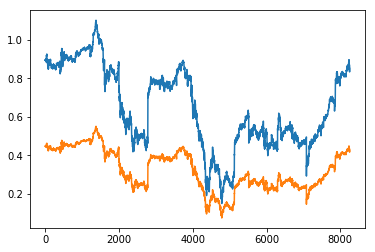

In [29]:
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()


In [30]:
batch_size = 256
mse_train = []
mse_test = []

MSE Train:  8.682262e-05
MSE Test:  0.022980968


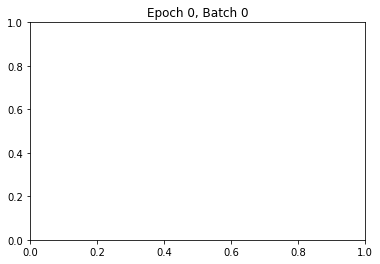

MSE Train:  0.000113105714
MSE Test:  0.024595166


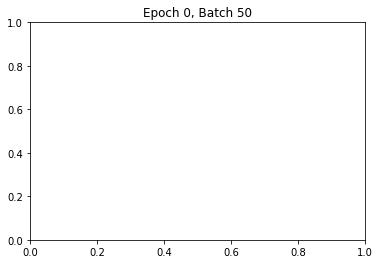

MSE Train:  8.765066e-05
MSE Test:  0.02299181


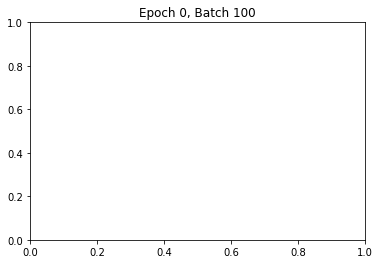

MSE Train:  0.00024871816
MSE Test:  0.023746625


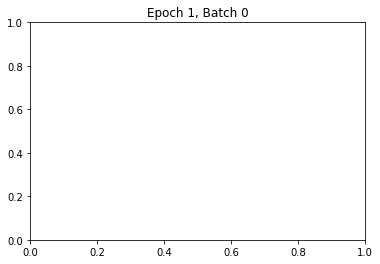

MSE Train:  7.2957046e-05
MSE Test:  0.020112688


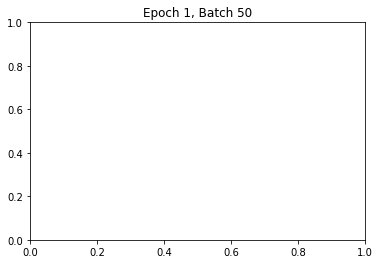

MSE Train:  7.230599e-05
MSE Test:  0.017883137


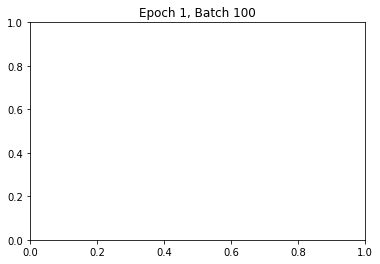

MSE Train:  5.5831686e-05
MSE Test:  0.017017592


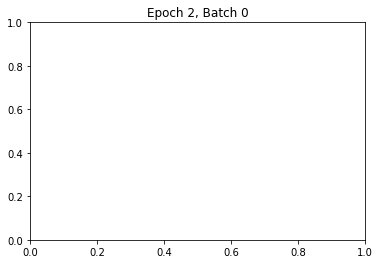

MSE Train:  8.312989e-05
MSE Test:  0.017495127


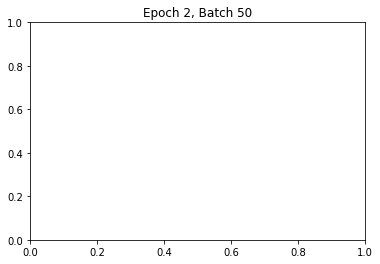

MSE Train:  6.4925545e-05
MSE Test:  0.015712852


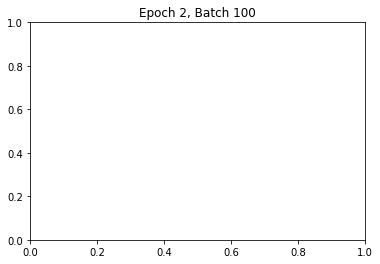

MSE Train:  8.496174e-05
MSE Test:  0.014989108


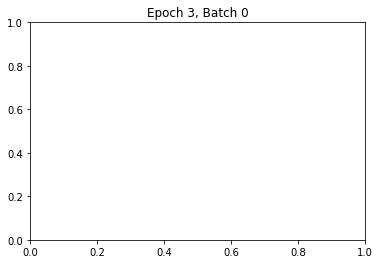

MSE Train:  0.00011499509
MSE Test:  0.013276951


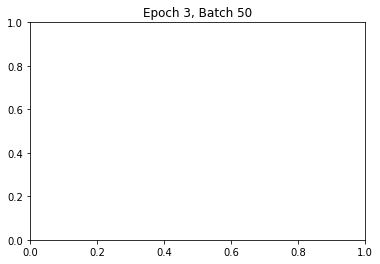

MSE Train:  5.7592435e-05
MSE Test:  0.014803372


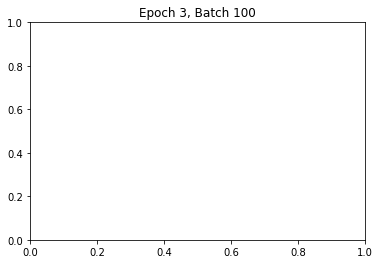

MSE Train:  0.00015520235
MSE Test:  0.015081327


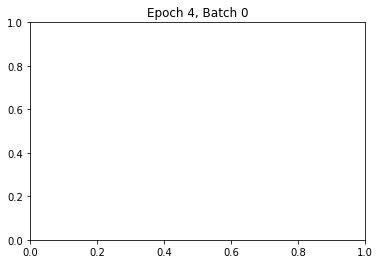

MSE Train:  9.311733e-05
MSE Test:  0.014233208


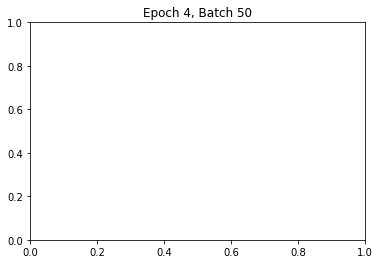

MSE Train:  0.00013257827
MSE Test:  0.016103879


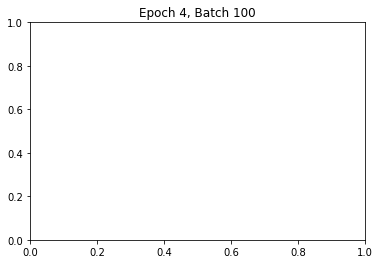

MSE Train:  6.815391e-05
MSE Test:  0.015702808


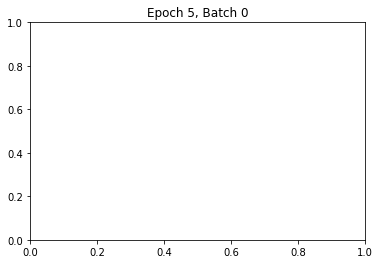

MSE Train:  8.725476e-05
MSE Test:  0.016245179


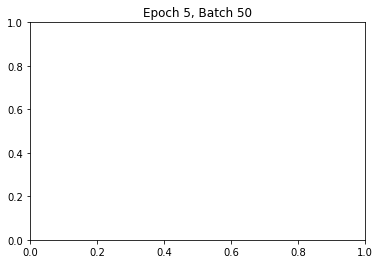

MSE Train:  8.132935e-05
MSE Test:  0.014920905


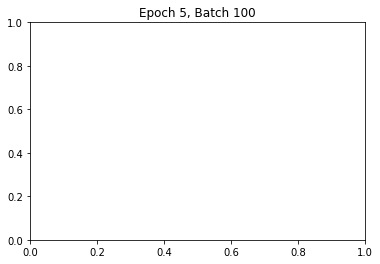

MSE Train:  6.996569e-05
MSE Test:  0.015339011


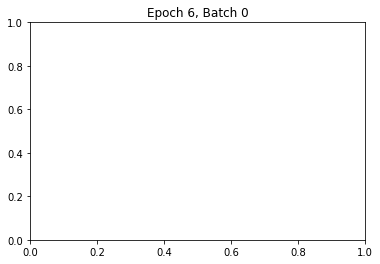

MSE Train:  0.00011331087
MSE Test:  0.015300599


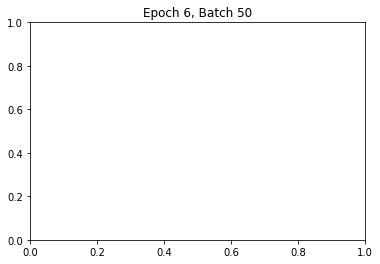

MSE Train:  4.5251072e-05
MSE Test:  0.015617229


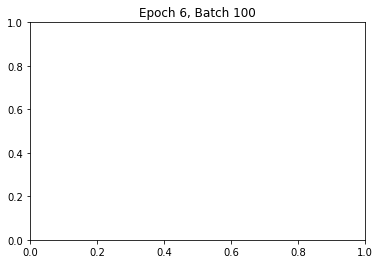

MSE Train:  6.6964e-05
MSE Test:  0.01348623


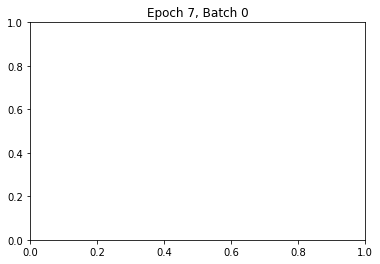

MSE Train:  0.00011707246
MSE Test:  0.016288536


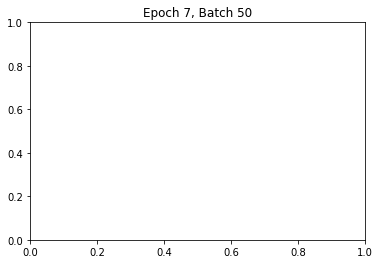

MSE Train:  0.00015833971
MSE Test:  0.01275016


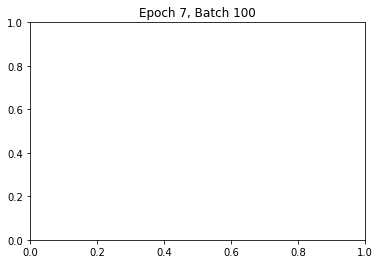

MSE Train:  7.081585e-05
MSE Test:  0.015152753


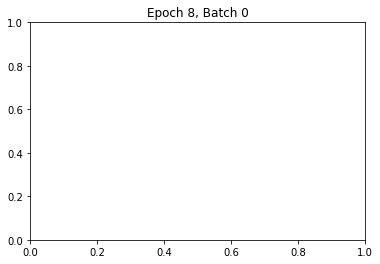

MSE Train:  4.8736943e-05
MSE Test:  0.017125886


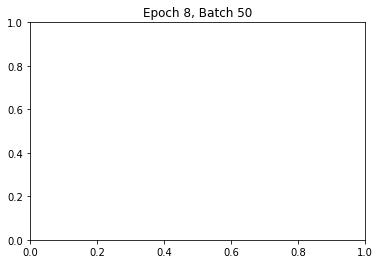

MSE Train:  5.2211253e-05
MSE Test:  0.017329905


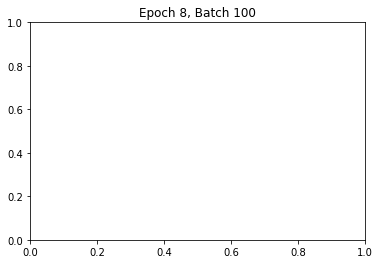

MSE Train:  4.5119315e-05
MSE Test:  0.017793076


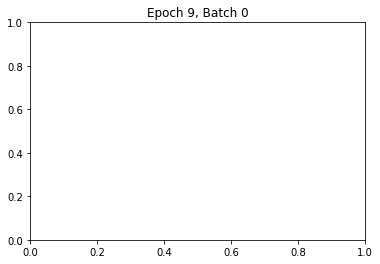

MSE Train:  7.1657145e-05
MSE Test:  0.015405972


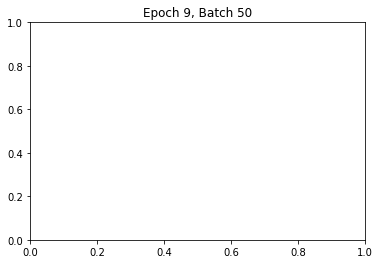

MSE Train:  0.00010711447
MSE Test:  0.017274458


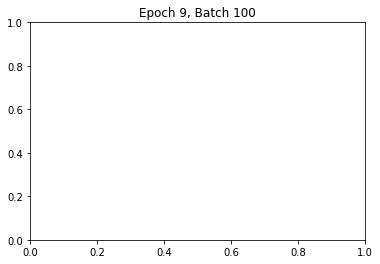

In [32]:
epochs = 10
for e in range(epochs):

                    
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

      
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        
        if np.mod(i, 50) == 0:
            
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)